In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import math
import os
import random
import numpy as np
import pandas as pd
from pandas import DataFrame
import cPickle as pickle
import math
import copy

In [3]:
marginal_lik = np.load('./MixNN_EM/marginal_lik_val.npy')
cond_lik = np.load('./MixNN_EM/cond_lik_val.npy')
mixcomp_prob = np.load('./MixNN_EM/mixcomp_prob.npy')

In [4]:
val_labels = np.loadtxt('./mixnn_em_data/Y_val_hist.txt')

In [5]:
val_indices = np.loadtxt('./mixnn_em_data/val_indices.txt')

In [6]:
# Get chosen actions: marginalise out over latent
actions_chosen = np.argmax(marginal_lik, axis=1)

# Physician actions
val_labels_asvec = np.argmax(val_labels, axis=1)

# Actions chosen by the mix components
mix_actions_chosen = np.argmax(cond_lik, axis=1)

In [7]:
inv_action_map = {}
count = 0
for i in range(5):
    for j in range(5):
        inv_action_map[count] = np.array([i,j])
        count += 1

In [9]:
actions_chosen_tuple = np.array([inv_action_map[i] for i in actions_chosen])
val_labels_asvec_tuple = np.array([inv_action_map[i] for i in val_labels_asvec])

mix_actions_chosen_tuple = np.zeros(shape=[mix_actions_chosen.shape[0], 2, mix_actions_chosen.shape[1]])
for i in range(mix_actions_chosen.shape[0]):
    for j in range(mix_actions_chosen.shape[1]):
        mix_actions_chosen_tuple[i,:,j] = inv_action_map[mix_actions_chosen[i,j]]

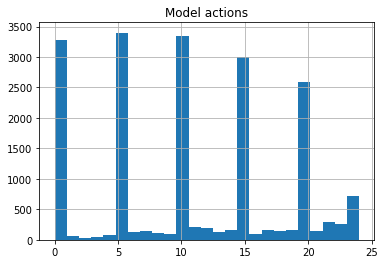

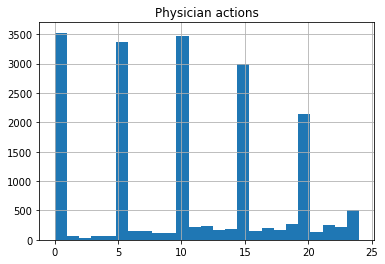

In [21]:
# actions chosen by model argmax vs actions chosen by model
pd.Series(actions_chosen).hist(bins=25)
plt.title('Model actions')
plt.show()

pd.Series(val_labels_asvec).hist(bins=25)
plt.title('Physician actions')
plt.show()

In [22]:
num_mix_comps = mixcomp_prob.shape[1]

9623


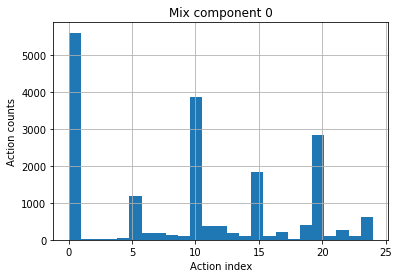

10374


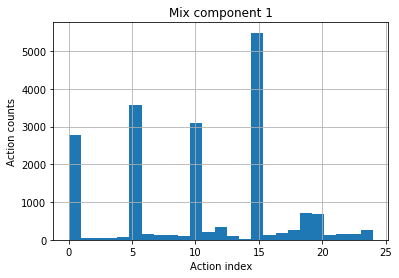

10272


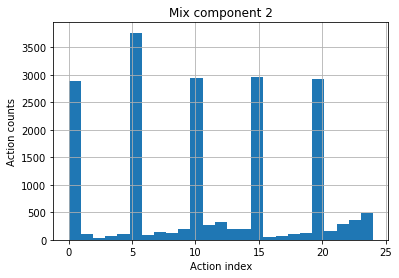

11245


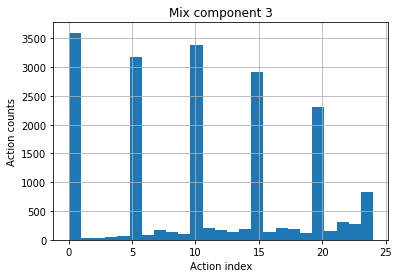

9714


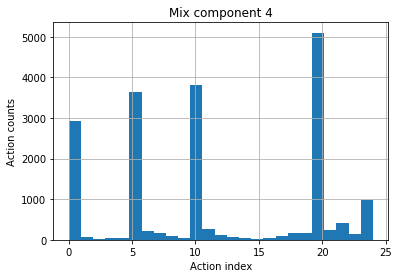

In [23]:
# Actions chosen by mix comps
for i in range(num_mix_comps):
    pd.Series(mix_actions_chosen[:,i]).hist(bins=25)
    print sum(mix_actions_chosen[:,i] == val_labels_asvec)
    plt.title('Mix component %d' % (i,))
    plt.ylabel('Action counts')
    plt.xlabel('Action index')
    plt.show()

In [167]:
hist_phys, x_edges, y_edges = np.histogram2d(phys_actions_iv, phys_actions_vaso, bins=5)

In [24]:
# Plot some 2D heatmaps for better interpretability
phys_actions_iv = val_labels_asvec_tuple[:,0]
phys_actions_vaso = val_labels_asvec_tuple[:,1]
hist_phys, x_edges, y_edges = np.histogram2d(phys_actions_iv, phys_actions_vaso, bins=5)

actions_chosen_iv = actions_chosen_tuple[:,0]
actions_chosen_vaso = actions_chosen_tuple[:,1]
hist_marginal, _, _ = np.histogram2d(actions_chosen_iv, actions_chosen_vaso, bins=5)

hist_mix_comp = []
for comp in range(mix_actions_chosen.shape[1]):
    rel_slice = mix_actions_chosen_tuple[:,:,comp]
    tmp_iv = rel_slice[:,0]
    tmp_vaso = rel_slice[:,1]
    tmp_hist, _, _ = np.histogram2d(tmp_iv, tmp_vaso, bins=5)
    hist_mix_comp.append(tmp_hist)

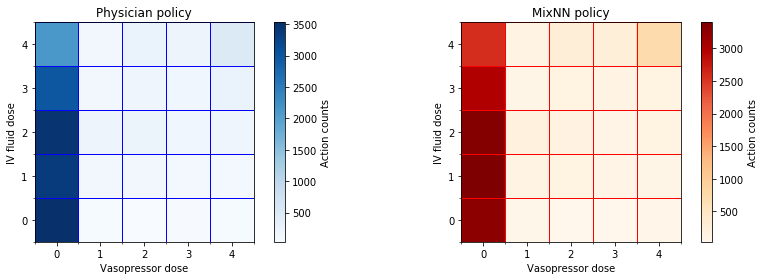

In [25]:
x_edges = np.arange(-0.5,5)
y_edges = np.arange(-0.5,5)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.imshow(np.flipud(hist_phys), cmap="Blues",extent=[x_edges[0], x_edges[-1],  y_edges[0],y_edges[-1]])
ax2.imshow(np.flipud(hist_marginal), cmap="OrRd", extent=[x_edges[0], x_edges[-1],  y_edges[0],y_edges[-1]])


# Major ticks
ax1.set_xticks(np.arange(0, 5, 1));
ax1.set_yticks(np.arange(0, 5, 1));
ax2.set_xticks(np.arange(0, 5, 1));
ax2.set_yticks(np.arange(0, 5, 1));


# Labels for major ticks
ax1.set_xticklabels(np.arange(0, 5, 1));
ax1.set_yticklabels(np.arange(0, 5, 1));
ax2.set_xticklabels(np.arange(0, 5, 1));
ax2.set_yticklabels(np.arange(0, 5, 1));

# Minor ticks
ax1.set_xticks(np.arange(-.5, 5, 1), minor=True);
ax1.set_yticks(np.arange(-.5, 5, 1), minor=True);
ax2.set_xticks(np.arange(-.5, 5, 1), minor=True);
ax2.set_yticks(np.arange(-.5, 5, 1), minor=True);

# Gridlines based on minor ticks
ax1.grid(which='minor', color='b', linestyle='-', linewidth=1)
ax2.grid(which='minor', color='r', linestyle='-', linewidth=1)

im1 = ax1.pcolormesh(x_edges, y_edges, hist_phys, cmap='Blues')
f.colorbar(im1, ax=ax1, label = "Action counts")

im2 = ax2.pcolormesh(x_edges, y_edges, hist_marginal, cmap='OrRd')
f.colorbar(im2, ax=ax2, label = "Action counts")


ax1.set_ylabel('IV fluid dose')
ax2.set_ylabel('IV fluid dose')
ax1.set_xlabel('Vasopressor dose')
ax2.set_xlabel('Vasopressor dose')


ax1.set_title("Physician policy")
ax2.set_title("MixNN policy")
plt.tight_layout()

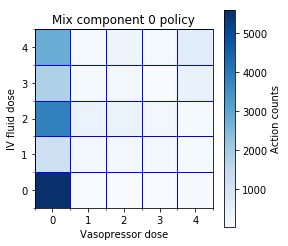

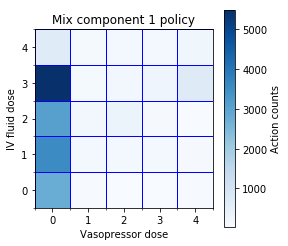

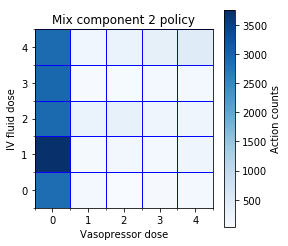

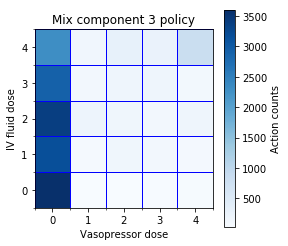

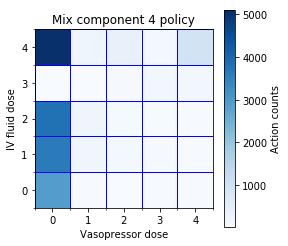

In [50]:
# histogram plots for the mixture components
for i, hist in enumerate(hist_mix_comp):
    f, ax1 = plt.subplots(1, 1, figsize=(4,4))
    ax1.imshow(np.flipud(hist), cmap="Blues",extent=[x_edges[0], x_edges[-1],  y_edges[0],y_edges[-1]])

    # Major ticks
    ax1.set_xticks(np.arange(0, 5, 1));
    ax1.set_yticks(np.arange(0, 5, 1));


    # Labels for major ticks
    ax1.set_xticklabels(np.arange(0, 5, 1));
    ax1.set_yticklabels(np.arange(0, 5, 1));

    # Minor ticks
    ax1.set_xticks(np.arange(-.5, 5, 1), minor=True);
    ax1.set_yticks(np.arange(-.5, 5, 1), minor=True);

    # Gridlines based on minor ticks
    ax1.grid(which='minor', color='b', linestyle='-', linewidth=1)

    im1 = ax1.pcolormesh(x_edges, y_edges, hist, cmap='Blues')
    f.colorbar(im1, ax=ax1, label = "Action counts")

    ax1.set_ylabel('IV fluid dose')
    ax1.set_xlabel('Vasopressor dose')

    ax1.set_title("Mix component %d policy" % i)
    plt.show()

In [27]:
# the ones above are for all patients.
# Now consider when we stratify by severity -- select entries that have SOFA scores in certain ranges
# find entries in validation df that we actually selected
# consider the argmax actions
df_orig = pd.read_csv('../data/MKdataset07Feb17.csv')
val_df = pd.read_csv('../data/rl_val_set_unscaled.csv')
df_orig_val = df_orig.loc[df_orig['icustayid'].isin(val_df['icustayid'].unique())]
df_orig_val = df_orig_val.iloc[val_indices]
del df_orig

In [28]:
low_sofa = np.array(df_orig_val['SOFA'] <= 5)
med_sofa = np.array(df_orig_val['SOFA'] > 5)
med_sofa[(df_orig_val['SOFA']) > 15] = False
high_sofa = np.array(df_orig_val['SOFA'] > 15)

In [29]:
cl_argmax_lowsofa = mix_actions_chosen[low_sofa]
cl_argmax_medsofa = mix_actions_chosen[med_sofa]
cl_argmax_highsofa = mix_actions_chosen[high_sofa]

marg_argmax_lowsofa = actions_chosen[low_sofa]
marg_argmax_medsofa = actions_chosen[med_sofa]
marg_argmax_highsofa = actions_chosen[high_sofa]

In [51]:
def convert_iv_vaso(arr):
    res = np.zeros(shape=[arr.shape[0], 2, arr.shape[1]])
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            res[i,:,j] = inv_action_map[arr[i,j]]
    return res


In [83]:
def gen_hist(arr, iv_vaso_arr, comp_num=None):
    res = []
    if comp_num is None:
        comp_num = arr.shape[1]
    for comp in range(comp_num):
        rel_slice = iv_vaso_arr[:,:,comp]
        tmp_iv = rel_slice[:,0]
        tmp_vaso = rel_slice[:,1]
        tmp_hist, _, _ = np.histogram2d(tmp_iv, tmp_vaso, bins=5)
        res.append(tmp_hist)
    return res

    

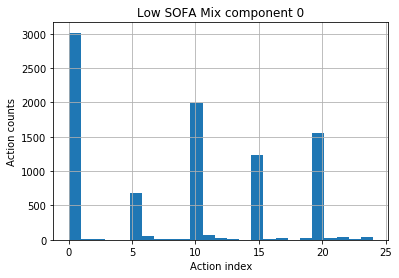

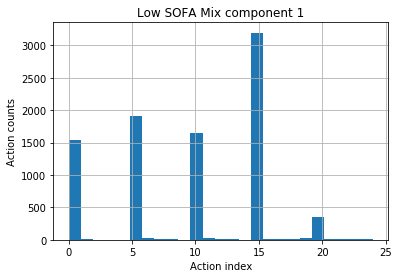

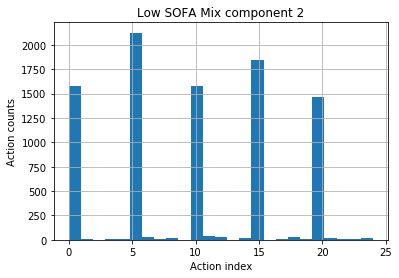

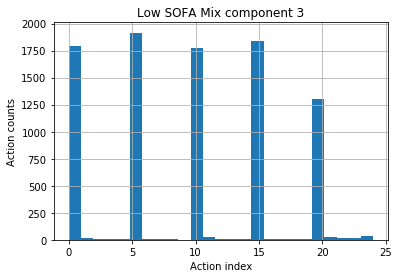

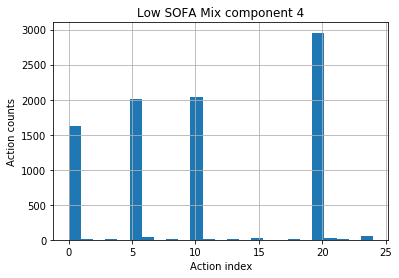

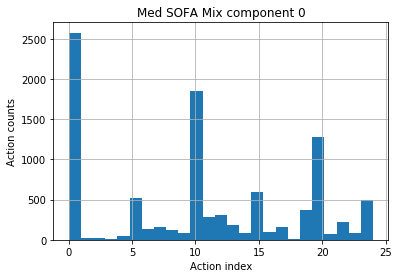

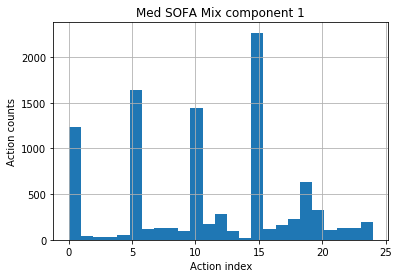

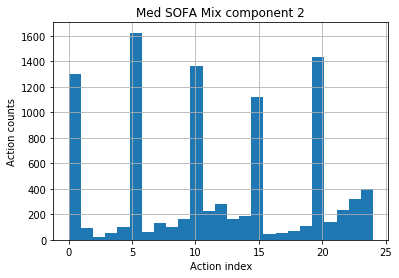

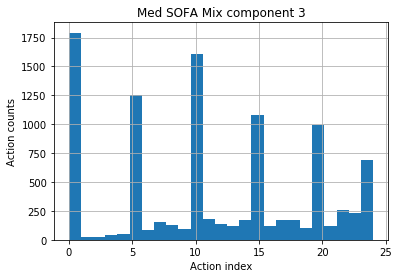

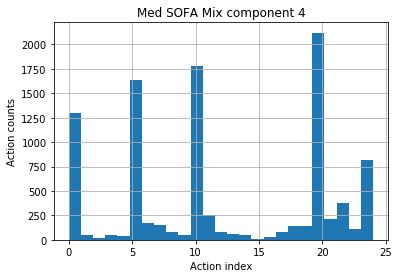

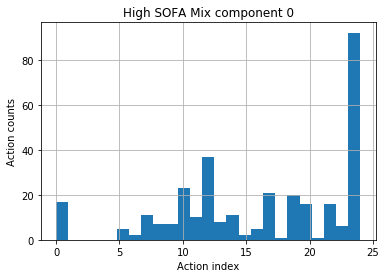

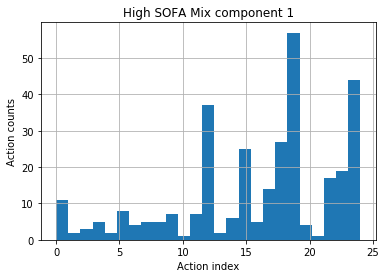

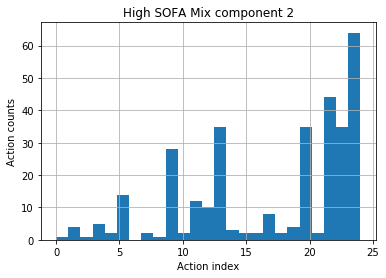

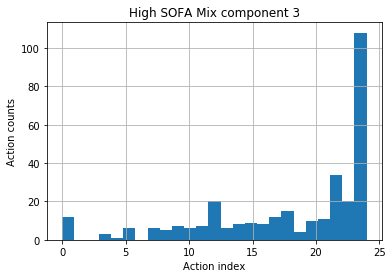

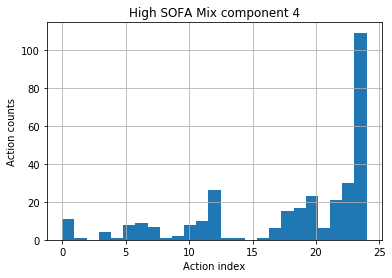

In [30]:
for ind, c in enumerate([cl_argmax_lowsofa, cl_argmax_medsofa, cl_argmax_highsofa ]):
    if ind == 0:
        s = "Low SOFA"
    elif ind == 1:
        s =  "Med SOFA"
    elif ind == 2:
        s =  "High SOFA"
    for i in range(num_mix_comps):
        pd.Series( c[:,i]).hist(bins=25)
        plt.title(s + ' Mix component %d' % (i,))
        plt.ylabel('Action counts')
        plt.xlabel('Action index')
        plt.show()

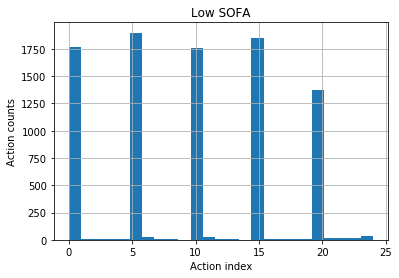

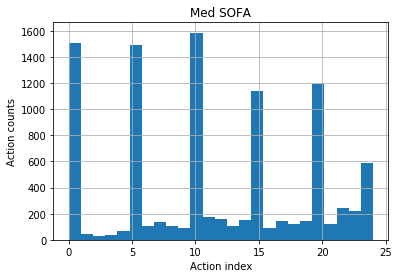

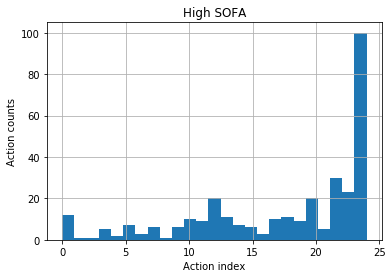

In [31]:
# finally plot the results after marginalising out the latent
for ind, m in enumerate([marg_argmax_lowsofa, marg_argmax_medsofa, marg_argmax_highsofa]):
    if ind == 0:
        s = "Low SOFA"
    elif ind == 1:
        s =  "Med SOFA"
    elif ind == 2:
        s =  "High SOFA"
    pd.Series(m).hist(bins=25)
    plt.ylabel('Action counts')
    plt.xlabel('Action index')
    plt.title(s)
    plt.show()

In [91]:
marg_actions_chosen_lowsofa_tuple = convert_iv_vaso(np.expand_dims(marg_argmax_lowsofa, axis=1))
marg_actions_chosen_medsofa_tuple = convert_iv_vaso(np.expand_dims(marg_argmax_medsofa, axis=1))
marg_actions_chosen_highsofa_tuple = convert_iv_vaso(np.expand_dims(marg_argmax_highsofa, axis=1))

hist_low_sofa = np.squeeze(np.array(gen_hist(marg_argmax_lowsofa, marg_actions_chosen_lowsofa_tuple, comp_num=1)))
hist_med_sofa = np.squeeze(np.array(gen_hist(marg_argmax_medsofa, marg_actions_chosen_medsofa_tuple, comp_num=1)))
hist_high_sofa = np.squeeze(np.array(gen_hist(marg_argmax_highsofa, marg_actions_chosen_highsofa_tuple, comp_num=1)))

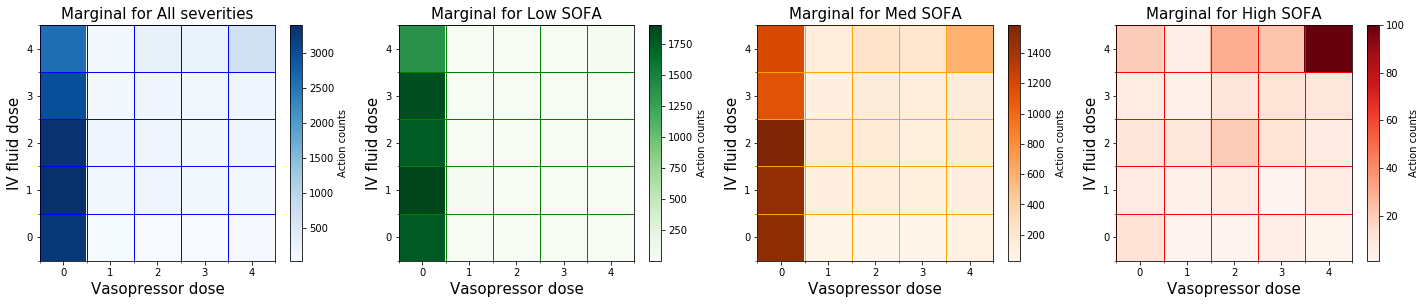

In [99]:
# plot histograms for latent marginalised out
hist_array_marginal = [hist_marginal, hist_low_sofa, hist_med_sofa, hist_high_sofa]

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,4))

iter_array = [[ax1, hist_array_marginal[0]], [ax2, hist_array_marginal[1]], 
              [ax3, hist_array_marginal[2]], [ax4, hist_array_marginal[3]]]

for plot_number, (ax_obj, hist) in enumerate(iter_array):

    if plot_number == 0:
        s = "All severities"
        rel_cmap = 'Blues'
        rel_gridcolor = 'b'
    elif plot_number == 1:
        s = "Low SOFA"
        rel_cmap = 'Greens'
        rel_gridcolor = 'g'
    elif plot_number == 2:
        s =  "Med SOFA"
        rel_cmap = 'Oranges'
        rel_gridcolor = 'orange'
    elif plot_number == 3:
        s =  "High SOFA"
        rel_cmap = 'Reds'
        rel_gridcolor = 'r'

    ax_obj.imshow(np.flipud(hist), cmap=rel_cmap,extent=[x_edges[0], x_edges[-1],  y_edges[0],y_edges[-1]])

    # Major ticks
    ax_obj.set_xticks(np.arange(0, 5, 1));
    ax_obj.set_yticks(np.arange(0, 5, 1));


    # Labels for major ticks
    ax_obj.set_xticklabels(np.arange(0, 5, 1));
    ax_obj.set_yticklabels(np.arange(0, 5, 1));

    # Minor ticks
    ax_obj.set_xticks(np.arange(-.5, 5, 1), minor=True);
    ax_obj.set_yticks(np.arange(-.5, 5, 1), minor=True);

    # Gridlines based on minor ticks
    ax_obj.grid(which='minor', color=rel_gridcolor, linestyle='-', linewidth=1)

    im1 = ax_obj.pcolormesh(x_edges, y_edges, hist, cmap=rel_cmap)
    f.colorbar(im1, ax=ax_obj, label = "Action counts")

    ax_obj.set_ylabel('IV fluid dose', fontsize=15)
    ax_obj.set_xlabel('Vasopressor dose', fontsize=15)

    ax_obj.set_title("Marginal for %s" % (s,), fontsize=15)
plt.tight_layout()
plt.show()



In [53]:
# plot of severity and learned policies

mix_actions_chosen_lowsofa_tuple = convert_iv_vaso(cl_argmax_lowsofa)
mix_actions_chosen_medsofa_tuple = convert_iv_vaso(cl_argmax_medsofa)
mix_actions_chosen_highsofa_tuple = convert_iv_vaso(cl_argmax_highsofa)

hist_mix_comp = gen_hist(mix_actions_chosen, mix_actions_chosen_tuple)

hist_mix_comp_lowsofa = gen_hist(cl_argmax_lowsofa, mix_actions_chosen_lowsofa_tuple)

hist_mix_comp_medsofa = gen_hist(cl_argmax_medsofa, mix_actions_chosen_medsofa_tuple)

hist_mix_comp_highsofa = gen_hist(cl_argmax_highsofa, mix_actions_chosen_highsofa_tuple)

In [58]:
hist_arrays = []
for comp in range(mix_actions_chosen.shape[1]):
    new_arr = []
    new_arr.append(hist_mix_comp[comp])
    new_arr.append(hist_mix_comp_lowsofa[comp])
    new_arr.append(hist_mix_comp_medsofa[comp])
    new_arr.append(hist_mix_comp_highsofa[comp])
    hist_arrays.append(new_arr)

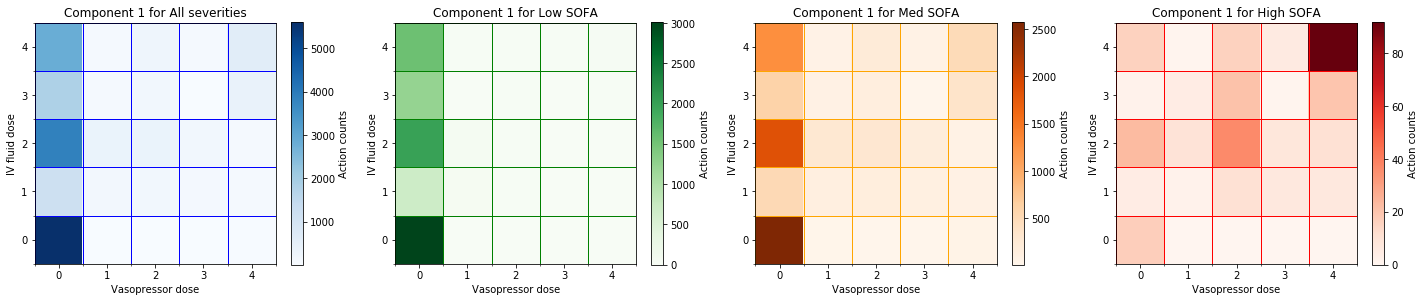

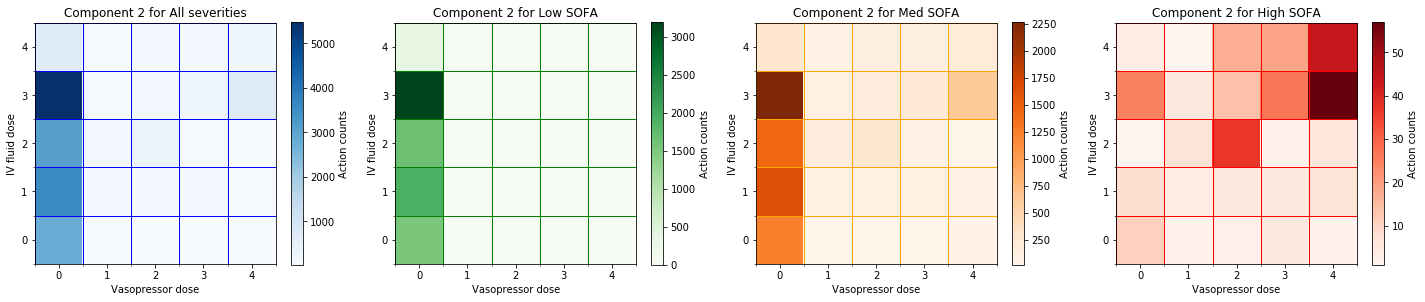

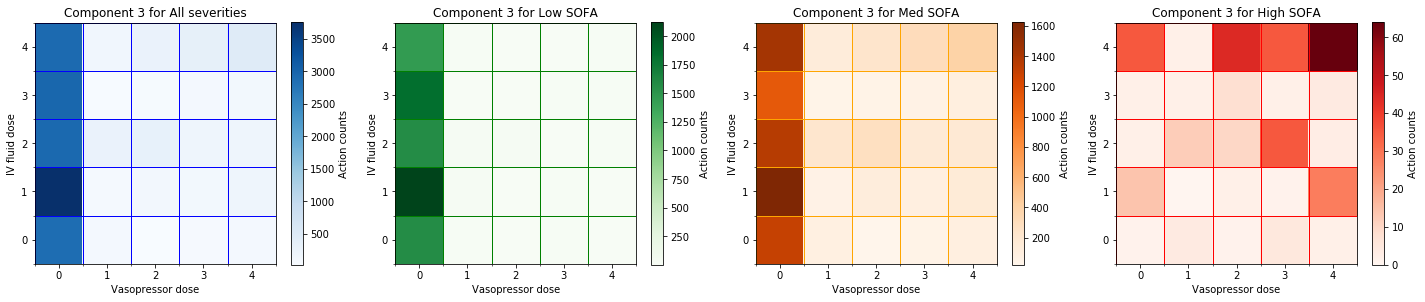

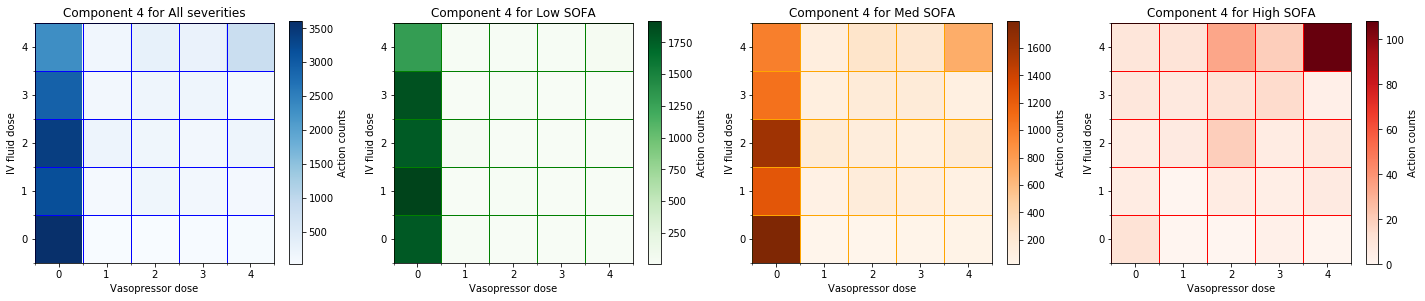

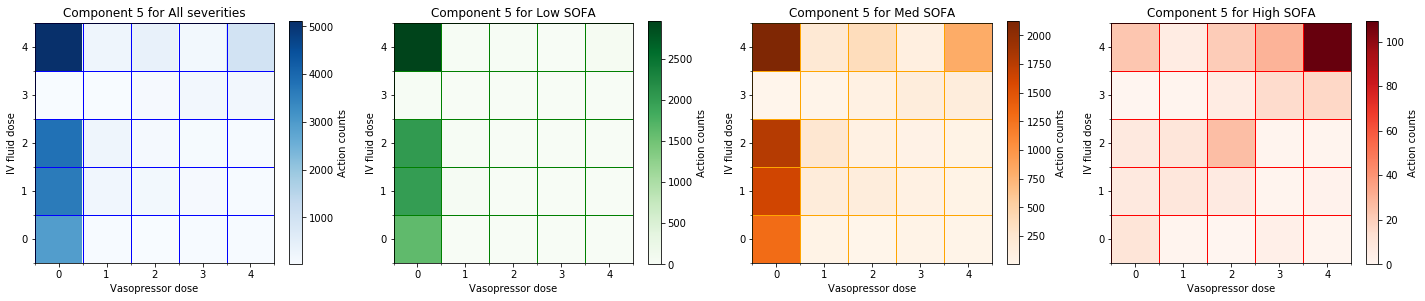

In [65]:
# histogram plots for the mixture components
for i, comp_histograms in enumerate(hist_arrays):
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,4))
    
    iter_array = [[ax1, comp_histograms[0]], [ax2, comp_histograms[1]], 
                  [ax3, comp_histograms[2]], [ax4, comp_histograms[3]]]
    
    for plot_number, (ax_obj, hist) in enumerate(iter_array):
        
        if plot_number == 0:
            s = "All severities"
            rel_cmap = 'Blues'
            rel_gridcolor = 'b'
        elif plot_number == 1:
            s = "Low SOFA"
            rel_cmap = 'Greens'
            rel_gridcolor = 'g'
        elif plot_number == 2:
            s =  "Med SOFA"
            rel_cmap = 'Oranges'
            rel_gridcolor = 'orange'
        elif plot_number == 3:
            s =  "High SOFA"
            rel_cmap = 'Reds'
            rel_gridcolor = 'r'
        
        ax_obj.imshow(np.flipud(hist), cmap=rel_cmap,extent=[x_edges[0], x_edges[-1],  y_edges[0],y_edges[-1]])

        # Major ticks
        ax_obj.set_xticks(np.arange(0, 5, 1));
        ax_obj.set_yticks(np.arange(0, 5, 1));


        # Labels for major ticks
        ax_obj.set_xticklabels(np.arange(0, 5, 1));
        ax_obj.set_yticklabels(np.arange(0, 5, 1));

        # Minor ticks
        ax_obj.set_xticks(np.arange(-.5, 5, 1), minor=True);
        ax_obj.set_yticks(np.arange(-.5, 5, 1), minor=True);

        # Gridlines based on minor ticks
        ax_obj.grid(which='minor', color=rel_gridcolor, linestyle='-', linewidth=1)

        im1 = ax_obj.pcolormesh(x_edges, y_edges, hist, cmap=rel_cmap)
        f.colorbar(im1, ax=ax_obj, label = "Action counts")

        ax_obj.set_ylabel('IV fluid dose')
        ax_obj.set_xlabel('Vasopressor dose')

        ax_obj.set_title("Component %d for %s" % (i+1, s))
    plt.tight_layout()
    plt.show()
    

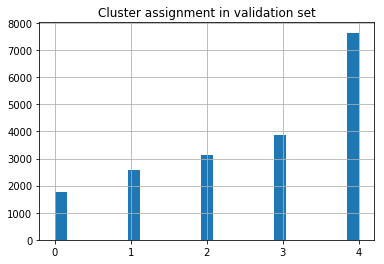

In [47]:
# Now consider some plots for the mixcomp
# stratify these by severity, time, and just a general plot
# again, consider the argmax
selected_clusters = np.argmax(mixcomp_prob, axis=1)
pd.Series(selected_clusters).hist(bins=25)
plt.title("Cluster assignment in validation set")
plt.xticks(np.arange(0,5))
plt.show()

In [33]:
cluster_lowsofa = selected_clusters[low_sofa]
cluster_medsofa = selected_clusters[med_sofa]
cluster_highsofa = selected_clusters[high_sofa]

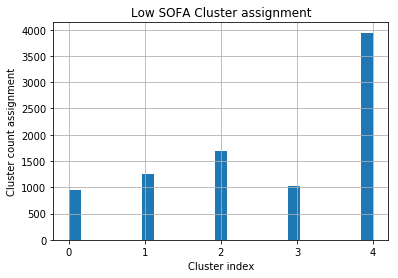

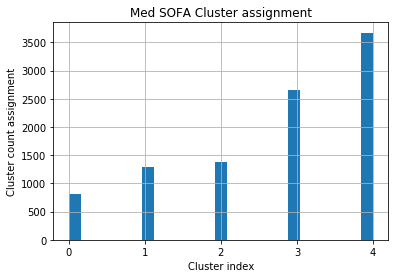

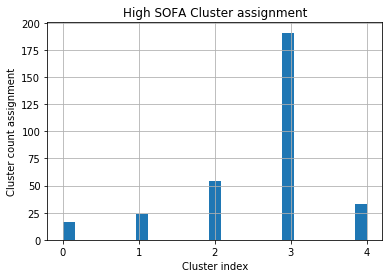

In [48]:
# clusters by severity
for ind, m in enumerate([cluster_lowsofa, cluster_medsofa, cluster_highsofa]):
    if ind == 0:
        s = "Low SOFA"
    elif ind == 1:
        s =  "Med SOFA"
    elif ind == 2:
        s =  "High SOFA"
    pd.Series(m).hist(bins=25)
    plt.ylabel('Cluster count assignment')
    plt.xlabel('Cluster index')
    plt.title(s + " Cluster assignment")
    plt.xticks(np.arange(0,5))
    plt.show()

In [78]:
# clusters by timestep
low_time = np.array(df_orig_val['bloc'] <= 8)
med_time = np.array(df_orig_val['bloc'] > 8)
med_time[(df_orig_val['bloc']) > 15] = False
high_time = np.array(df_orig_val['bloc'] >= 15)

In [79]:
cluster_lowtime = selected_clusters[low_time]
cluster_medtime = selected_clusters[med_time]
cluster_hightime = selected_clusters[high_time]

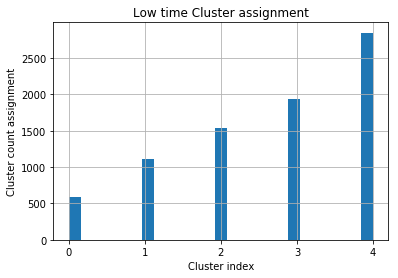

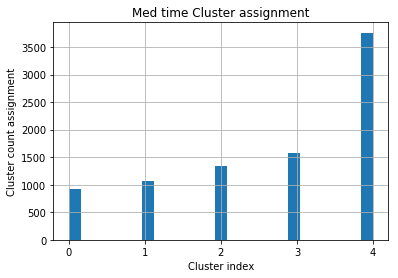

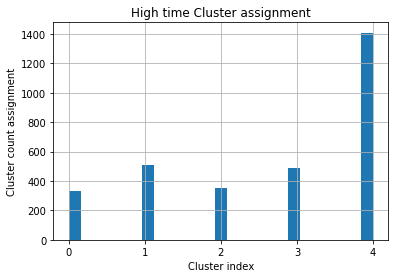

In [80]:
# clusters by timestep
for ind, m in enumerate([cluster_lowtime, cluster_medtime, cluster_hightime]):
    if ind == 0:
        s = "Low time"
    elif ind == 1:
        s =  "Med time"
    elif ind == 2:
        s =  "High time"
    pd.Series(m).hist(bins=25)
    plt.ylabel('Cluster count assignment')
    plt.xlabel('Cluster index')
    plt.title(s + " Cluster assignment")
    plt.xticks(np.arange(0,5))
    plt.show()

In [100]:
selected_clusters.shape

(18974,)

In [207]:
patients = np.random.choice(df_orig_val['icustayid'].unique(), 20)

In [208]:
chosen_cluster_elems = selected_clusters[df_orig_val['icustayid'].isin(patients)]

In [209]:
chosen_patient_hist = df_orig_val.loc[df_orig_val['icustayid'].isin(patients)]['icustayid'].values

In [213]:
lookup = {i:v for (i,v) in zip(patients, range(len(patients)))}

In [214]:
chosen_patient_hist = np.array([lookup[i] for i in chosen_patient_hist])

In [215]:
cluster_assignment_hist = np.histogram2d(chosen_cluster_elems, chosen_patient_hist, bins=[5,20])

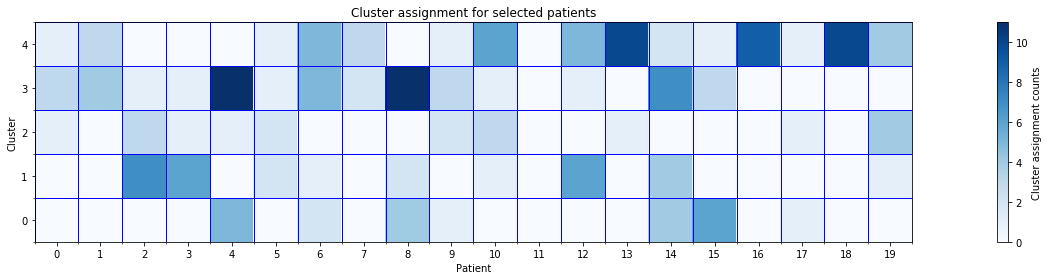

In [217]:
cluster_assignment_hist,_,_ = np.histogram2d(chosen_cluster_elems, chosen_patient_hist, bins=[5,20])

x_edges = np.arange(-0.5,20)
y_edges = np.arange(-0.5,5)

f, ax1 = plt.subplots(1, 1, figsize=(24,4))

ax1.imshow(cluster_assignment_hist, cmap="Blues",extent=[x_edges[0], x_edges[-1],  y_edges[0],y_edges[-1]])

ax1.set_xticks(np.arange(0, 20, 1));
ax1.set_yticks(np.arange(0, 5, 1));

ax1.set_xticklabels(np.arange(0, 20, 1));
ax1.set_yticklabels(np.arange(0, 5, 1));

ax1.set_xticks(np.arange(-.5, 20, 1), minor=True);
ax1.set_yticks(np.arange(-.5, 5, 1), minor=True);

# Gridlines based on minor ticks
ax1.grid(which='minor', color='b', linestyle='-', linewidth=1)

im1 = ax1.pcolormesh(x_edges,y_edges, cluster_assignment_hist, cmap='Blues')
f.colorbar(im1, ax=ax1, label = "Cluster assignment counts")

ax1.set_xlabel('Patient')
ax1.set_ylabel('Cluster')

ax1.set_title('Cluster assignment for selected patients')
plt.tight_layout()

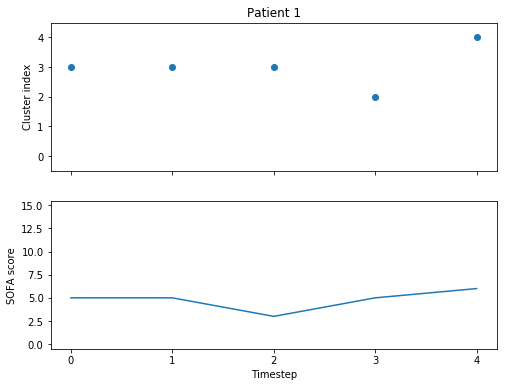

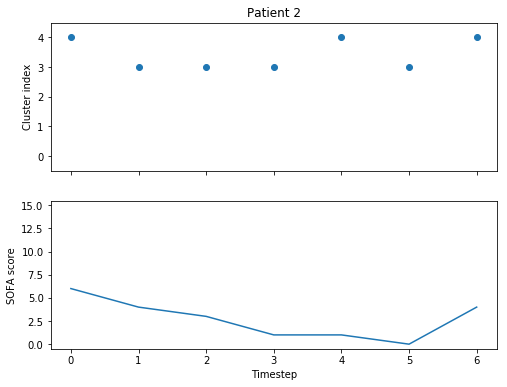

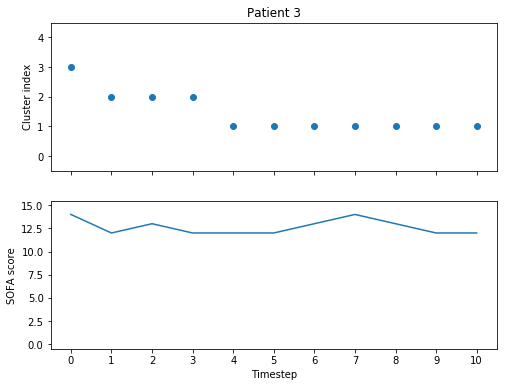

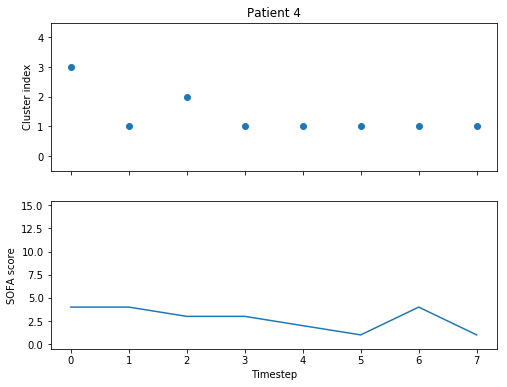

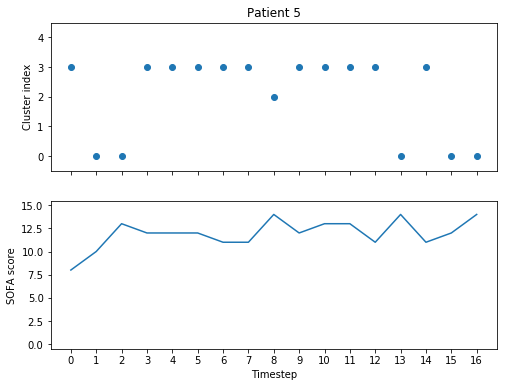

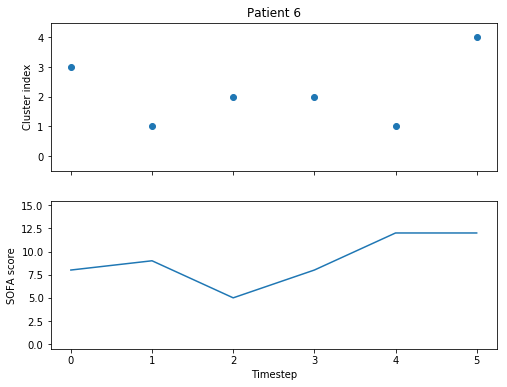

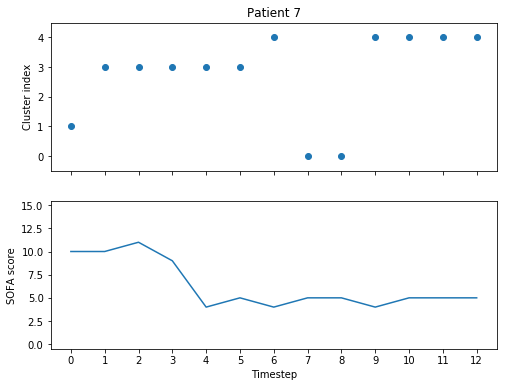

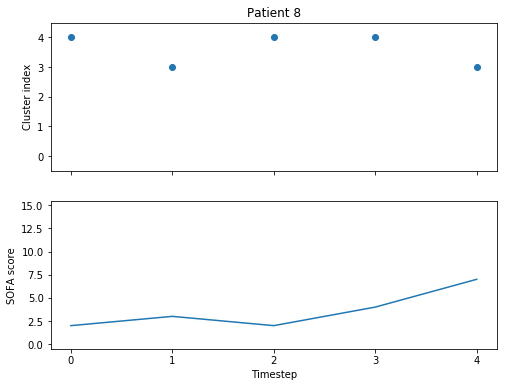

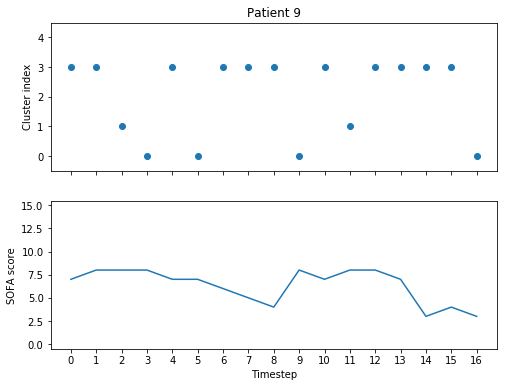

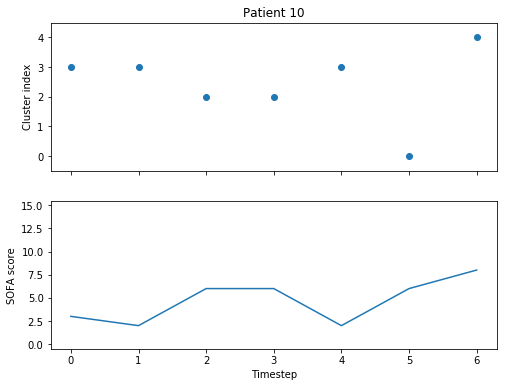

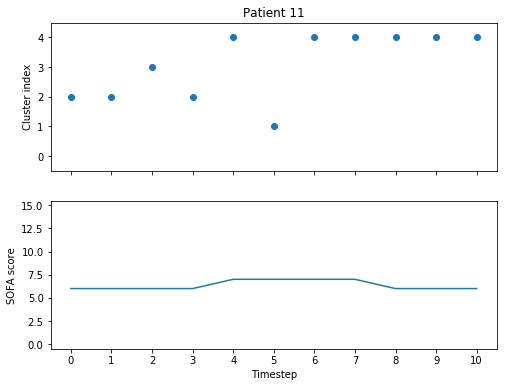

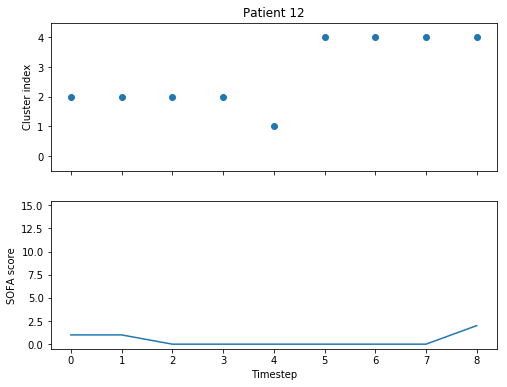

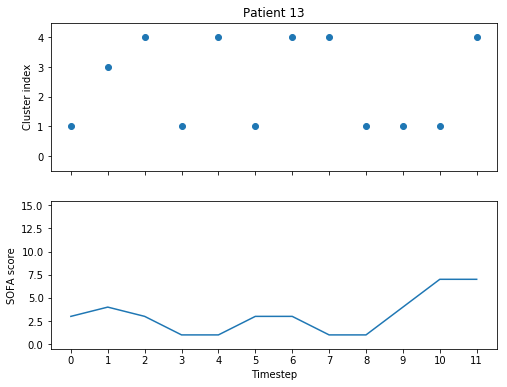

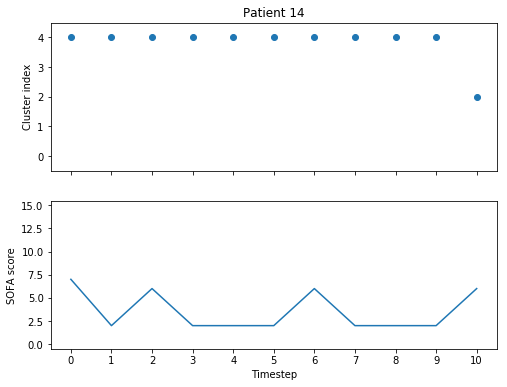

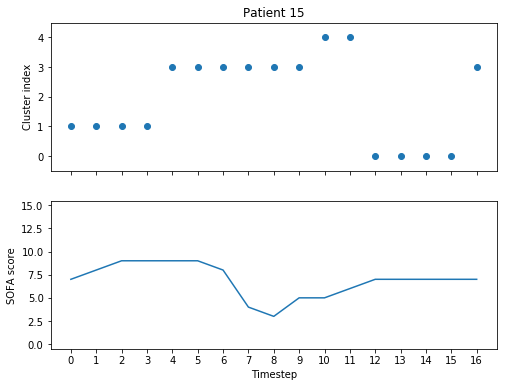

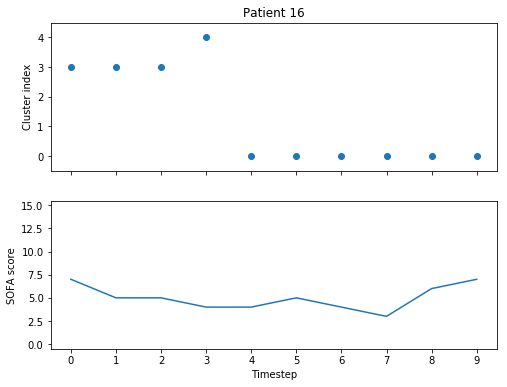

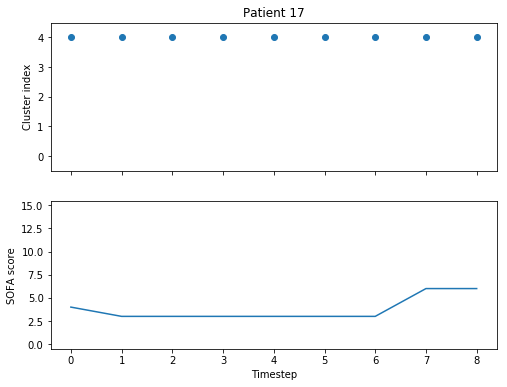

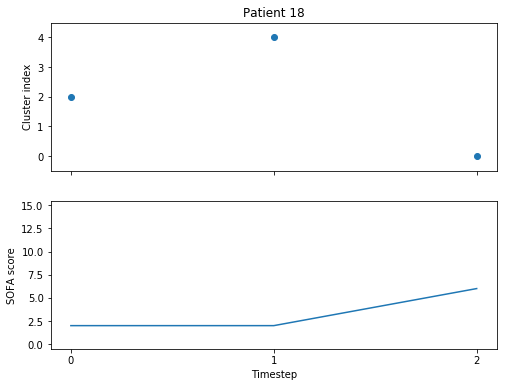

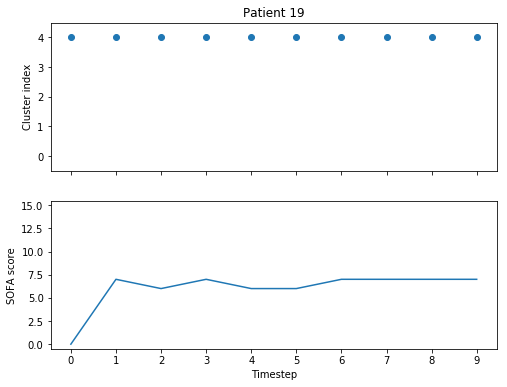

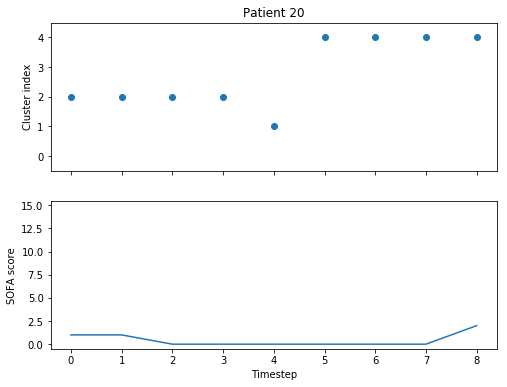

In [254]:
# plot evolution over time
for i, p in enumerate(patients):
    f, (ax1,ax2) = plt.subplots(2,1, figsize=(8,6), sharex=True)
    rel_ind = df_orig_val['icustayid'] == p
    sev = df_orig_val.loc[rel_ind]['SOFA'].values
    rel_clust = selected_clusters[rel_ind]
    
    ax1.set_ylim([-0.5,4.5])
    ax1.plot(rel_clust, 'o')
    ax1.set_xticks(range(len(rel_clust)))
    ax1.set_ylabel('Cluster index')
    ax2.set_ylim([-0.5,15.5])
    ax2.plot(sev)
    ax2.set_xticks(range(len(rel_clust)))
    ax2.set_ylabel('SOFA score')
    ax2.set_xlabel('Timestep')
    ax1.set_title('Patient %d' % (i+1,))
    plt.show()
    # put in a severity plot (SOFA)
    

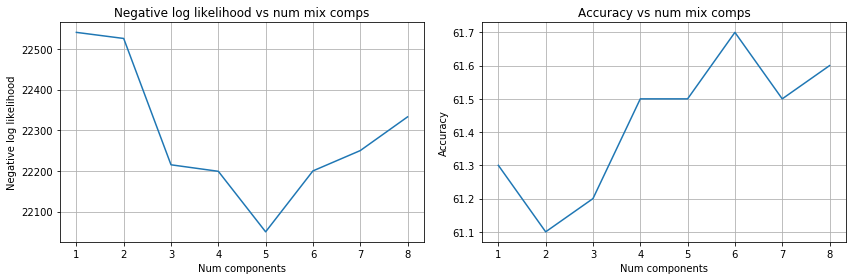

In [70]:
# final plot of num comp vs negative log lik
x = range(1,9)
y1 = [22541, 22526, 22215, 22199, 22050, 22200, 22250, 22333]
y2 = [61.3, 61.1, 61.2, 61.5, 61.5, 61.7, 61.5, 61.6]
f, (ax1, ax2) = plt.subplots(1,2, figsize = (12,4))
ax1.plot(x, y1)
ax1.set_title('Negative log likelihood vs num mix comps')
ax1.set_xlabel('Num components')
ax1.set_ylabel('Negative log likelihood')
ax1.grid()

ax2.plot(x, y2)
ax2.set_title('Accuracy vs num mix comps')
ax2.set_xlabel('Num components')
_ = ax2.set_ylabel('Accuracy')
ax2.grid()

plt.tight_layout()

